In [1]:
import numpy as np
file2use = 'obsinfo_60656.npz'
obs = np.load(file2use, allow_pickle=True)

In [2]:
def ticks(dat, ticks=8, precision=-1):
    if isinstance(ticks, (float, int)):
        xstart, xstep = np.round(np.floor(dat[0]), precision), np.round((dat[-1] - dat[0]) / ticks, precision)
        x = [int(xx) for xx in np.arange(xstart, np.ceil(dat[-1]), xstep)]
    elif isinstance(ticks, list):
        x = [int(xx) for xx in np.arange(ticks[0], ticks[1]+1, ticks[2])] if len(ticks) == 3 else ticks
    return np.round(np.interp(x, dat, np.arange(len(dat))), 0), x

def dB(x):
    return 10.0 * np.log10(x)

In [3]:
for key in obs.keys():
    if key.startswith('S11'):
        print(key)

S11087_60656.9442
S11105_60656.9684
S11117_60656.9534
S11119_60657.0063
S11146_60657.0136
S11186_60656.9358
S11190_60657.0382
S11225_60657.0309
S11259_60656.9883
S11261_60656.9777


In [4]:
obsid = 'S11087_60656.9442'  # Choose one of the above OBSIDs
record = obs[obsid].tolist()
print(f"Reference transit time [UTC]: {record['tref']}")

Reference transit time [UTC]: 2024-12-12T22:43:16


Each of the above OBSIDs represents a period of observation where the telescope tracks a sidereal sky position and a DTC-equipped satellite passes through boresight during that track.  The OBSID is S<satnumber>_<MJD.mjd>

Each OBSID record has 

- a spectrograph (a so-called "waterfall" plot referenced by the antenna/polarization e.g. 2bxx)
- tref: the reference time when we expect to pass through boresight
- seconds: time in seconds offset from tref
- boresight: the corresponding angle from boresight
- some filtered spectra/time-series shown below

The Waterfall plot is shown below.  Pick 'boresight' or 'seconds' to see the axis relative to boresight angle or time offset in seconds.

In [5]:
key2use = 'boresight'
if key2use not in ['boresight', 'seconds']:
    raise ValueError("Must be boresight or seconds")

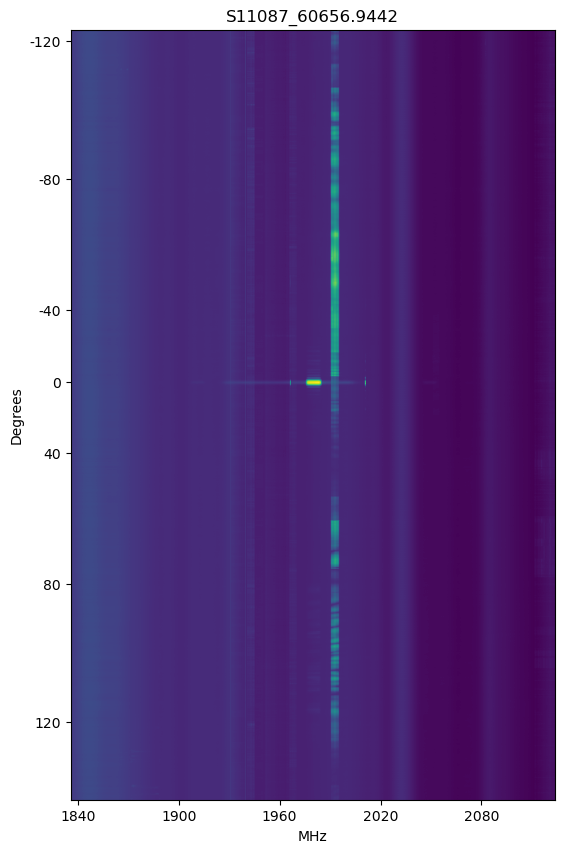

In [12]:
import matplotlib.pyplot as plt
antpol = '2bxx'  # Fixed for now
plt.figure('Waterfall', figsize=(20, 10))
plt.imshow(dB(record[antpol]))
_ = plt.xlabel('MHz')
_ = plt.ylabel('Degrees' if key2use=='boresight' else 'Seconds')
xt, xl = ticks(obs['freqs'], 5)
_ = plt.xticks(xt, xl)
yt, yl = ticks(record[key2use], [-120, 120, 40])
_ = plt.yticks(yt, yl)
_ = plt.title(obsid)

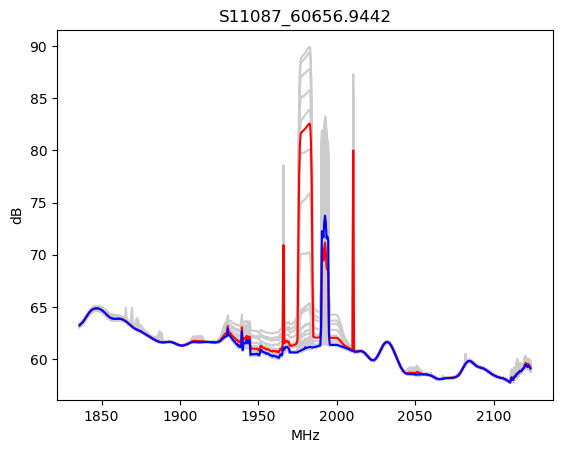

In [7]:
plt.figure('Frequency')
for i in range(len(record[key2use])):
    plt.plot(obs['freqs'], dB(record[antpol][i]), '0.8')
_ = plt.xlabel('MHz')
_ = plt.ylabel('dB')
plt.plot(obs['freqs'], dB(record['on']), 'r')
plt.plot(obs['freqs'], dB(record['off']), 'b')
_ = plt.title(obsid)

The plot above shows all of the spectra in gray.  The red line is the spectrum using +/- 5 degrees around boresight while blue line is outside of +/-5 degrees.  The plot below shows the ratio of the two in dB.

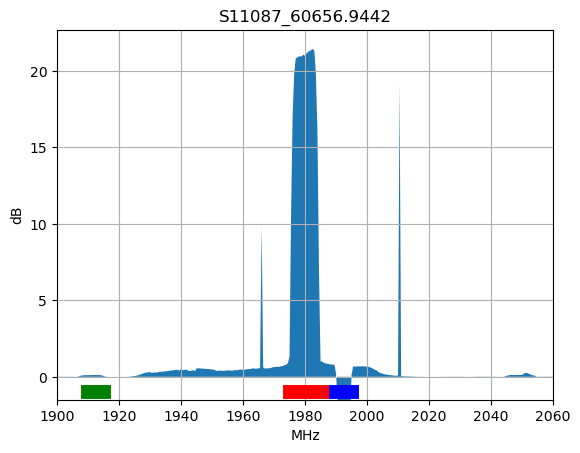

In [8]:
plt.fill_between(obs['freqs'], dB(record['on']/record['off']))
_ = plt.grid()
plt.plot([1975, 1986], [-1, -1], color='r', lw=10)
plt.plot([1990, 1995], [-1, -1], color='b', lw=10)
plt.plot([1910, 1915], [-1, -1], color='g', lw=10)
_ = plt.xlabel('MHz')
_ = plt.ylabel('dB')
_ = plt.title(obsid)
_ = plt.axis(xmin=1900, xmax=2060, ymin=-1.5)

The plot above is essentially the "transmiter off" spectrum being emitted by a Starlink satellite. The colored bands at the bottom are the filters used for the plot below.

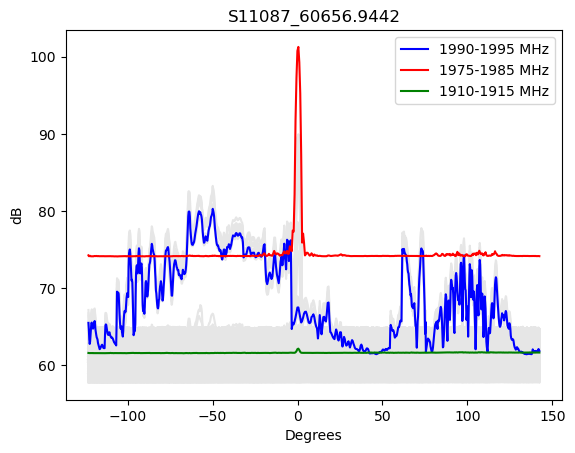

In [9]:
plt.figure(key2use)
for i in range(len(obs['freqs'])):
    plt.plot(record[key2use], dB(record[antpol][:, i]), color='0.9')
_ = plt.xlabel('Degrees' if key2use=='boresight' else 'Seconds')
_ = plt.ylabel('dB')
plt.plot(record[key2use], dB(record['dtz']), 'b', label='1990-1995 MHz')
plt.plot(record[key2use], dB(record['adjacent_feature']), 'r', label='1975-1985 MHz')
plt.plot(record[key2use], dB(record['low']), 'g', label='1910-1915 MHz')
_ = plt.legend()
_ = plt.title(obsid)

The plot above shows the boresight/time-offset power in the three color-coded bands.  The light gray behind is all of the data.